# Exploratory Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Load the Parquet file into a Pandas DataFrame
df = pd.read_parquet("all_car_details.parquet")
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places

# 1. Basic Information

# Print the first few rows of the DataFrame
print("First 5 rows:\n", df.head())

# Print the shape of the DataFrame (number of rows and columns)
print("\nShape of DataFrame:", df.shape)
# We can see on the output that we have 505804 rows and 41 columns of data. This means that there are 41 features which we are observing.

# Print the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Print summary statistics for numerical columns
print("\nSummary statistics for numerical columns:\n", df.describe())

First 5 rows:
                                                  url         make  \
0  https://www.autoscout24.com/offers/acm-biagini...          acm   
1  https://www.autoscout24.com/offers/acm-4-wd-el...          acm   
2  https://www.autoscout24.com/offers/acm-biagini...          acm   
3  https://www.autoscout24.com/offers/acm-others-...          acm   
4  https://www.autoscout24.com/offers/ariel-motor...  ariel-motor   

           car_title       price          seller       location  num_images  \
0  ACM Biagini Passo     4555.00  Private seller   Lokeren , BE         NaN   
1           ACM 4 WD 10000001.00  Private seller     Munich, DE        3.00   
2  ACM Biagini Passo     3500.00  Private seller   Valencia, ES       10.00   
3                ACM    17000.00  Private seller  Bonndorf , DE       14.00   
4   Ariel Motor Atom   100000.00  Private seller     ancona, IT       16.00   

       body_type          used_type drivetrain  ... electric_range  \
0    Convertible         

We can see the **first 5** rows with all the features.
We can also see that most of the features got recognised as "object" types, because of the pandas library. For simplicity we will only convert those features to the appropriate types when we need them.
Additionally, "Shape of DataFrame: (505804, 41)" means that we have 505,804 rows of data and 41 features of the following kinds:
**Basic attributes:**
- brand
- body_type
- drivetrain
- seats
- doors
- country
- model_code
**History of the car:**
- mileage
- registration
- gen_inspection
- owner_nr
- service_history
- smoker_owned
**Technical features:**
- power
- gearbox
- engine_size
- gears
- cylinders
- empty_weight
**Features of energy:**
- fuel_type
- consumption
- emission_class
- CO2_emission
- electric_range
**Equipment Range:**
- safety_eq
- modern_eq
- additional_eq
These features are exceptionally difficult to measure, because they don't have a specific structure to them. Some are empty, some have all kinds of lists.
**Color & Upholstery:**
- exterior
- manufacturer_color
- paint
- upholstery_color
- upholstery_type
This list is to just give an overall view here, there are some other columns, like num_images which shows the number of images posted with a car, but some of these features are not that important to put into categories.

Looking at the summary of the dataset, we can already see some outliers, like one example for **CO2 emission is 9999999.00**.

In [10]:
print(df["comfort_and_convenience"][10])

360° camera;Air conditioning;Air suspension;Armrest;Automatic climate control;Cruise control;Electrical side mirrors;Electrically adjustable seats;Fold flat passenger seat;Heated steering wheel;Hill Holder;Light sensor;Lumbar support;Multi-function steering wheel;Navigation system;Park Distance Control;Parking assist system camera;Parking assist system self-steering;Parking assist system sensors front;Parking assist system sensors rear;Power windows;Rain sensor;Rear seat heating;Seat heating;Start-stop system


As we can see, here is how it looks to view a car's **"Comfort and Convenience"** equipment. Among other things, we can see a 360 camera, Air conditioning, Air suspension, Armrest, Automatic Climate Control, Cruise Control etc... 
One reason that some data rows miss these types of lists is that, the site that we used, AutoScout24, allowed users to upload cars in a way that is not structured all the way. Some information is necessary to put inside an advertisement, like title, make and model and features like Equipment List is not necessary.
Another reason might also be that additions like air conditioning are considered basic equipment in today's vehicles, so owners don't consider it listing-worthy.

In [11]:
ferraris_df = df[df['make'] == 'ferrari']
print(len(ferraris_df))

4290



Missing values in each column:
 url                             0
make                            0
car_title                     189
price                         189
location                      189
used_type                     189
body_type                     195
power                         957
fuel_type                    1284
num_images                   6127
seller                       6730
mileage                      9146
gearbox                     11086
doors                       15704
first_registration          30034
seats                       36330
comfort_and_convenience     56408
exterior_colour             60830
safety_and_security         65483
engine_size                 73815
entertainment_and_media     88352
extras                      92447
cylinders                  143399
empty_weight               144041
drivetrain                 155046
upholstery                 157420
paint                      159166
upholstery_colour          188195
gears          

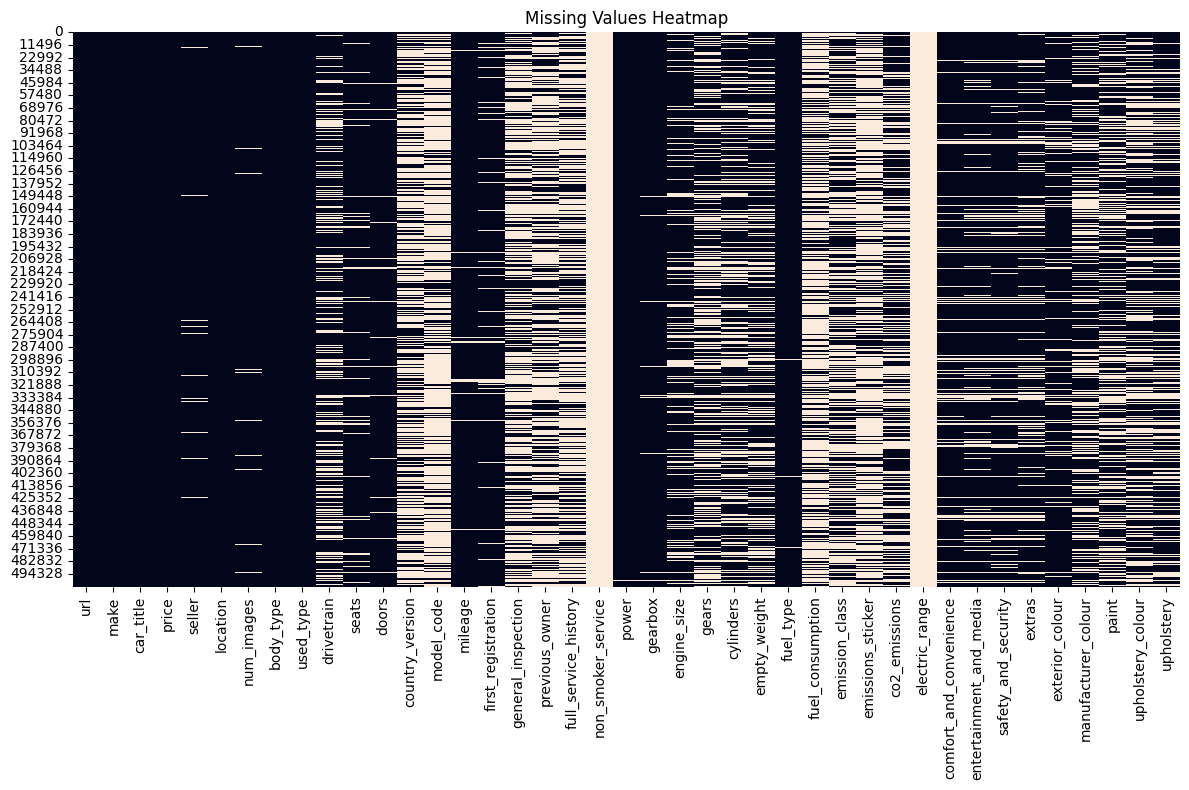

In [17]:
# 2. Missing Values

missing_values = df.isnull().sum().sort_values(ascending=True)
missing_percentage = (missing_values / len(df)) * 100

missing_stats = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

high_missing = missing_stats[missing_stats['Missing Percentage'] > 70].sort_values('Missing Percentage', ascending=False)

# Check for missing values in each column
print("\nMissing values in each column:\n", missing_values)

print("Features with more than 70% of the data missing:\n", high_missing)

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()


As we can see from both the numerical and the heatmap output, certain features, more accurately model_code, non_smoker_service and electric_range have **missing values in more than 70% of their rows**. We might want to delete them if we are using specific analyses, like *regression, correlation, specific Machine Learning models or PCA*.


Value counts for 'Make':
 make
mercedes-benz     31259
ford              27814
audi              27676
volkswagen        26311
renault           21133
                  ...  
cityel                1
lifan                 1
de-la-chapelle        1
mobilize              1
stormborn             1
Name: count, Length: 230, dtype: int64


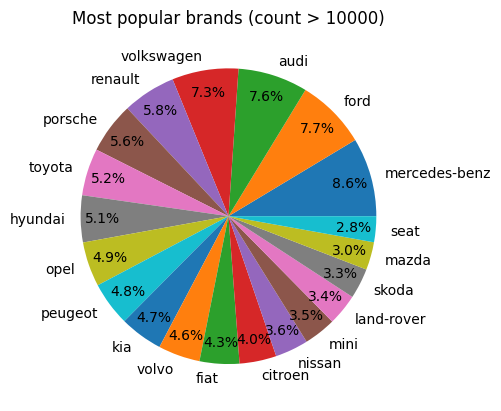

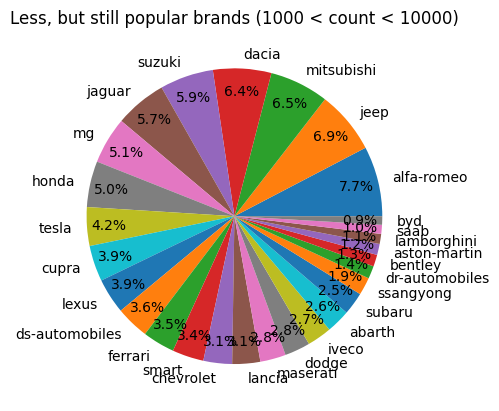

In [41]:
# 3. Value Counts for Categorical Columns

# Print value counts for categorical columns (example: 'Make')
print("\nValue counts for 'Make':\n", df['make'].value_counts().sort_values(ascending=False))

# Visualize value counts for a categorical column (example: 'Make')
make_counts = df['make'].value_counts()
popular_makes = make_counts[make_counts > 10000]
unpopular_makes = make_counts[(1000 < make_counts) & (make_counts < 10000)]
popular_makes.plot(kind='pie',
                        autopct='%1.1f%%',
                        pctdistance=0.85)# showing percentages with autopct
plt.title("Most popular brands (count > 10000)")
plt.ylabel('')
plt.show()

unpopular_makes.plot(kind='pie',
                        autopct='%1.1f%%',
                        pctdistance=0.85)# showing percentages with autopct
plt.title("Less, but still popular brands (1000 < count < 10000)")
plt.ylabel('')
plt.show()

*The percentages don't mean the overall ratios in the dataset, only regarding the pie chart contributions.*

On the top chart, we can see the **most popular brands**, which consist of makes like Mercedes Benz, Ford, Audi, Volkswagen, Renault etc... We see that these are the most popular cars that are advertised for reselling, as they might suggest reliability, keeping their value and being a trusted brand overall.

Below, on the second chart, there are the **less popular cars to resell**, we made the limit to lie between 1000 and 10000 as anything smaller than 1000 would create a really overpopulated graph. These are brands like Alfa-Romeo, Jeep, Mitsubishi, Dacia and such, but we can even see luxury brands like ferrari, tesla, maserati and some interesting ones, like the chinese BYD. These cars are not that represented in the reselling scheme, probably because of their overall rarity. Of course, you could also think that when someone buys an expensive car, they don't want to get rid of it. Cars like Tesla, have become a pretty popular choice for electric vehicles over the years, however their starting prices are not cheap, this could explain why people rather buy them used.

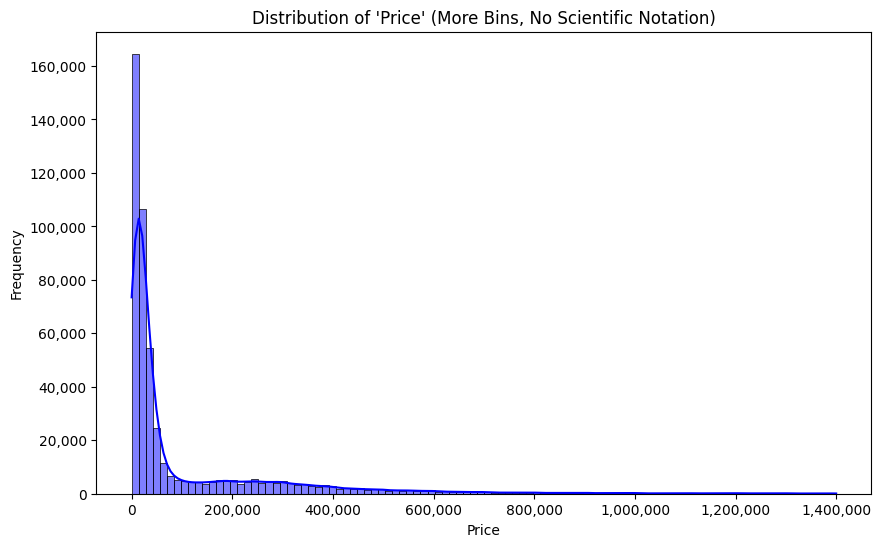

In [ ]:
# 4. Distributions of Numerical Columns
threshold = df['price'].quantile(0.99)  # 99th percentile
df_filtered = df[df['price'] <= threshold]

# Plot histograms for numerical columns (example: 'Price')
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'], bins=100, kde=True, color='blue')  # Increased bins to 100
plt.title("Distribution of 'Price'")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

We filtered prices, up to the maximum of the 99th percentile, and since there are luxury cars ranging even to 1,400,000 euro range, our histogram got sewerely right-skewed, having a long tail. If we were to not filter with the 99th percentile, then our histogram would be even more skewed, since some cars are listed with unrealistic prices on the website.

However, what we also know from the histogram is that most of the frequence, the number of cars, appear to be in the below 100,000 price range, which is not surprising since we are talking about used cars.

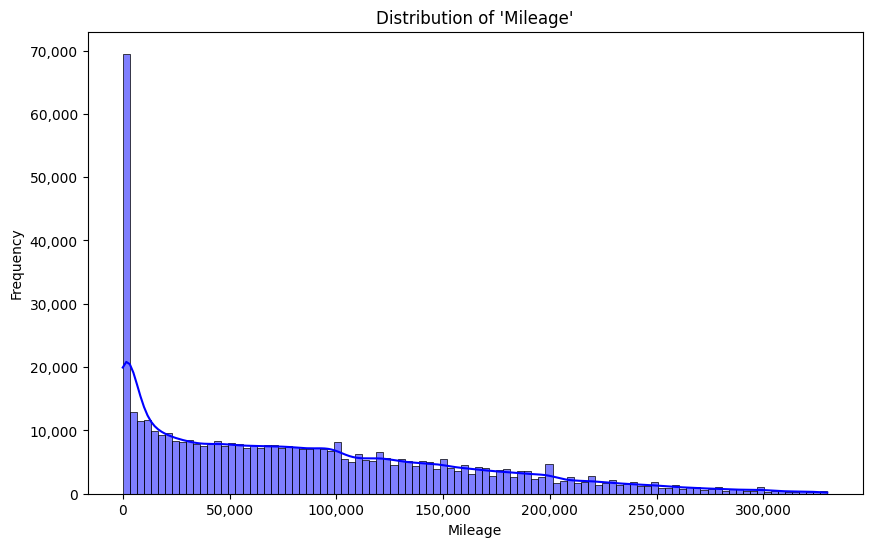

In [44]:
# 4. Distributions of Numerical Columns
threshold = df['mileage'].quantile(0.99)  # 99th percentile
df_filtered = df[df['mileage'] <= threshold]

# Plot histograms for numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['mileage'], bins=100, kde=True, color='blue')  # Increased bins to 100
plt.title("Distribution of 'Mileage'")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# To do: Continue visualization of other numerical features